Part 1: Analyzing Best-Seller Trends Across Product Categories
Objective: Understand the relationship between product categories and their best-seller status.

Crosstab Analysis:Create a crosstab between the product category and the isBestSeller status.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency
import math
%matplotlib inline

In [2]:
# Loading the AMAZON UK dataset 
file_path = r"C:\Users\hajar\OneDrive\Desktop\IronHack-sponsorship\Bootcamp-files\week_5\amz_uk_price_prediction_dataset.csv"

# Read the CSV file
df = pd.read_csv(file_path)

# Display basic information about the dataset
print("First 5 rows of the dataset:")
print(df.head())

print("\nSummary statistics:")
print(df.describe())

print("\nDataset info:")
print(df.info())

First 5 rows of the dataset:
   uid        asin                                              title  stars  \
0    1  B09B96TG33  Echo Dot (5th generation, 2022 release) | Big ...    4.7   
1    2  B01HTH3C8S  Anker Soundcore mini, Super-Portable Bluetooth...    4.7   
2    3  B09B8YWXDF  Echo Dot (5th generation, 2022 release) | Big ...    4.7   
3    4  B09B8T5VGV  Echo Dot with clock (5th generation, 2022 rele...    4.7   
4    5  B09WX6QD65  Introducing Echo Pop | Full sound compact Wi-F...    4.6   

   reviews  price  isBestSeller  boughtInLastMonth        category  
0    15308  21.99         False                  0  Hi-Fi Speakers  
1    98099  23.99          True                  0  Hi-Fi Speakers  
2    15308  21.99         False                  0  Hi-Fi Speakers  
3     7205  31.99         False                  0  Hi-Fi Speakers  
4     1881  17.99         False                  0  Hi-Fi Speakers  

Summary statistics:
                uid         stars       reviews        

In [3]:
# Generating a crosstab for 'MSZoning' and 'SaleCondition'
crosstab_result = pd.crosstab(df['category'], df['isBestSeller'])

crosstab_result

# to identify prevalent categories
#Are there categories where being a best-seller is more prevalent?
bestseller_category = df['category'].value_counts(normalize = True)
display(bestseller_category)
#Hint: one option is to calculate the proportion of best-sellers for each category 
#and 
#then sort the categories based on this proportion in descending order.
category_bestseller_proportion = df.groupby('category')['isBestSeller'].value_counts(normalize=True).unstack()
category_bestseller_proportion = category_bestseller_proportion.sort_values(by=True, ascending=False)
display(category_bestseller_proportion)

category
Sports & Outdoors                         0.342219
Beauty                                    0.007903
Handmade Clothing, Shoes & Accessories    0.007869
Bath & Body                               0.007813
Birthday Gifts                            0.007766
                                            ...   
Alexa Built-In Devices                    0.000044
Motorbike Chassis                         0.000044
Plugs                                     0.000044
Smart Home Security & Lighting            0.000043
Smart Speakers                            0.000022
Name: proportion, Length: 296, dtype: float64

isBestSeller,False,True
category,,
Grocery,0.941865,0.058135
Smart Home Security & Lighting,0.942308,0.057692
Health & Personal Care,0.942314,0.057686
Mobile Phone Accessories,0.957529,0.042471
Power & Hand Tools,0.964661,0.035339
...,...,...
Snowboard Boots,1.000000,NaN
Toy Advent Calendars,1.000000,NaN
USB Gadgets,1.000000,NaN


In [4]:
#Statistical Tests:

#Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
#Compute Cramér's V to understand the strength of association between best-seller status and category.

chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab_result)
print (f"\n chi2 statistics :", chi2_statistic)
print(f"\n chi2_p_value:", chi2_p_value)

# Carmer's V 
from scipy.stats.contingency import association

# Computing the association between variables in 'crosstab_result' using the "cramer" method
print(f"\n carmer's V:", association(crosstab_result, method="cramer"))



 chi2 statistics : 36540.20270061387

 chi2_p_value: 0.0

 carmer's V: 0.1222829439760564


<Figure size 1200x800 with 0 Axes>

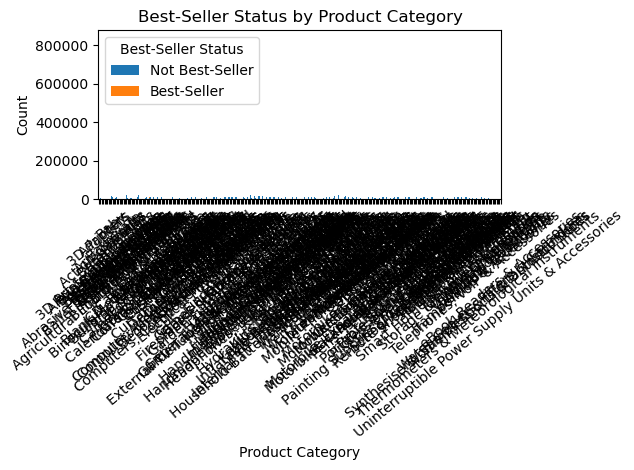

In [5]:
# 3. Visualization: Visualize the relationship between product categories and the best-seller status using a stacked bar chart.
plt.figure(figsize=(12, 8))
crosstab_result.plot(kind="bar", stacked=True);
plt.title('Best-Seller Status by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.legend(title='Best-Seller Status', labels=['Not Best-Seller', 'Best-Seller'])
plt.xticks(rotation=40)
plt.tight_layout()
plt.show()

Part 2: Exploring Product Prices and Ratings Across Categories and Brands

**Objective**: Investigate how different product categories influence product prices.

In [6]:
def tukeys_test_outliers(data):
    Q1 = df['price'].quantile(0.25)
    Q3 = df['price'].quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify the outliers
    outliers = df['price'][(df['price'] < lower_bound) | (df['price'] > upper_bound)]

    return outliers

outliers = tukeys_test_outliers(df['price'])
print(outliers)

10         139.00
19         164.99
25         149.99
28         289.00
31         199.99
            ...  
2443619    166.99
2443627    152.58
2443638    108.77
2443641    166.99
2443643    158.99
Name: price, Length: 327688, dtype: float64


In [7]:
# Remove outliers from data set
df_1 = df.iloc[~outliers.index,:] # ~ = NOT

C:\Users\hajar\AppData\Local\Temp\ipykernel_17344\3432844280.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='category', y='price', data=df_top_20, palette='muted')


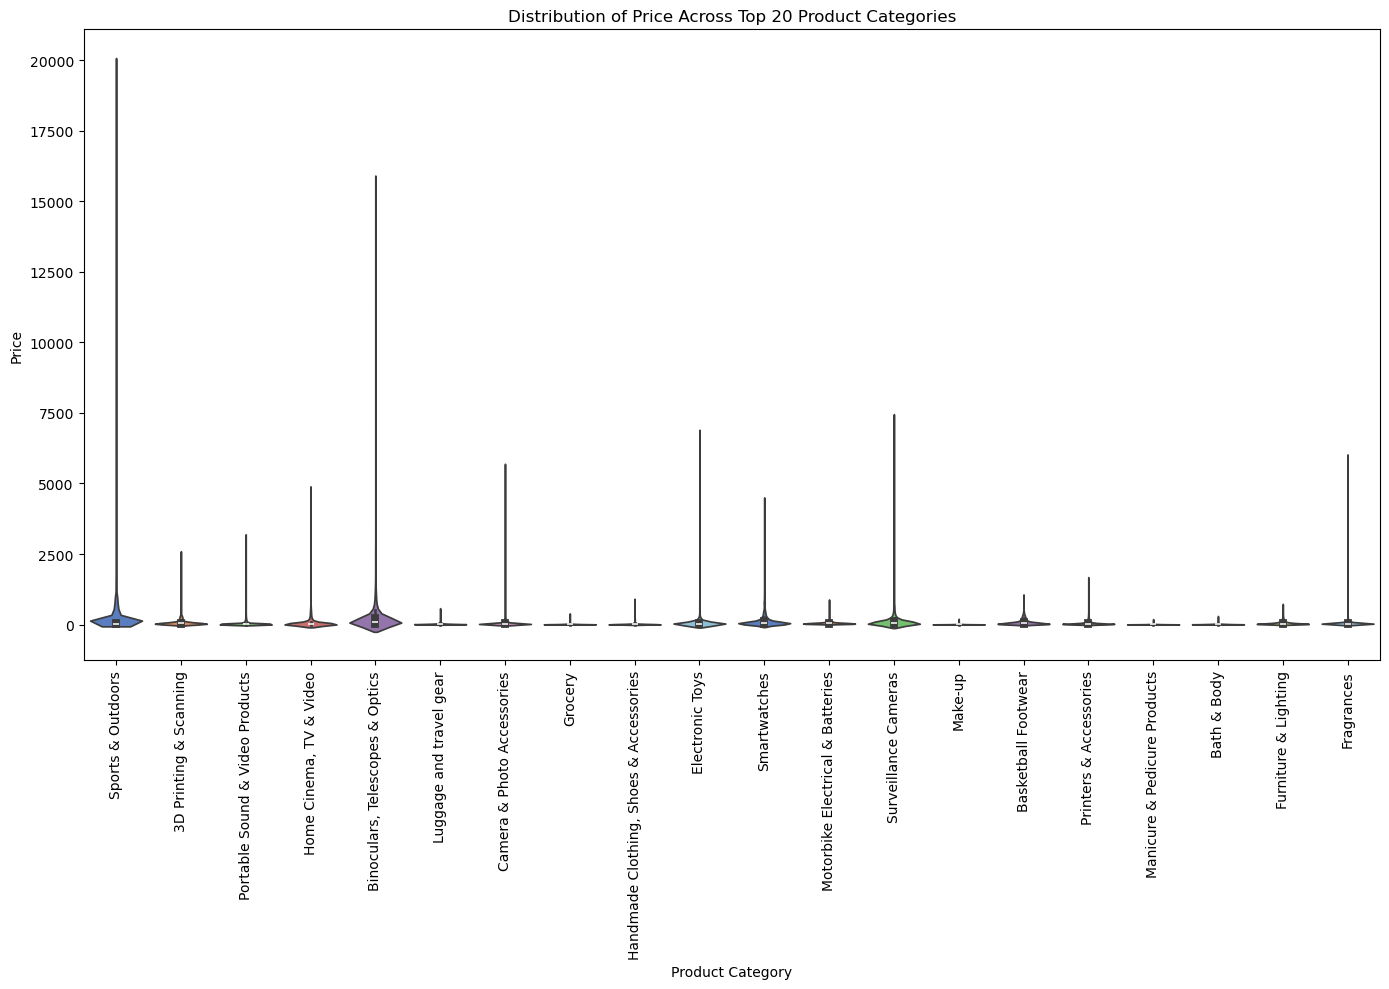

In [8]:
# Plotting a violin plot 
top_20_categories = df_1['category'].value_counts().head(20).index
df_top_20 = df_1[df_1['category'].isin(top_20_categories)]
plt.figure(figsize=(14, 10))
sns.violinplot(x='category', y='price', data=df_top_20, palette='muted')
plt.title('Distribution of Price Across Top 20 Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


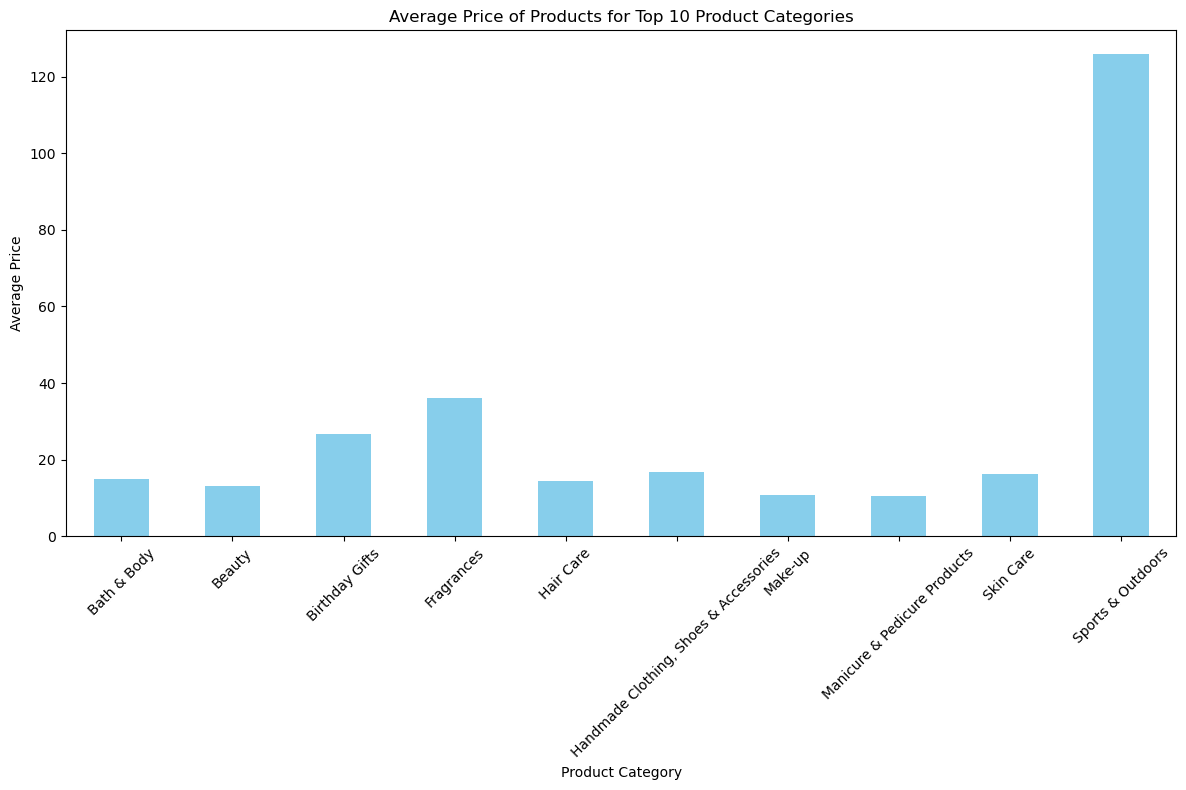

In [9]:
top_10_categories = df['category'].value_counts().head(10).index
df_top_10 = df[df['category'].isin(top_10_categories)]

# Calculate average price for the top 10 categories
avg_price_top_10 = df_top_10.groupby('category')['price'].mean()

plt.figure(figsize=(12, 8))
avg_price_top_10.plot(kind='bar', color='skyblue')

plt.title('Average Price of Products for Top 10 Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [10]:
median_stars_all = df.groupby('category')['stars'].median().sort_values(ascending = False).head(10)
median_stars_all

category
Computer Memory                 4.7
Hobbies                         4.6
Beer, Wine & Spirits            4.6
Laptop Accessories              4.6
Kids' Play Figures              4.6
Building & Construction Toys    4.6
CPUs                            4.6
Office Paper Products           4.6
Luxury Food & Drink             4.6
Camera & Photo Accessories      4.5
Name: stars, dtype: float64

C:\Users\hajar\AppData\Local\Temp\ipykernel_17344\3958245548.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='category', y='stars', data=df_top_10, palette='muted')


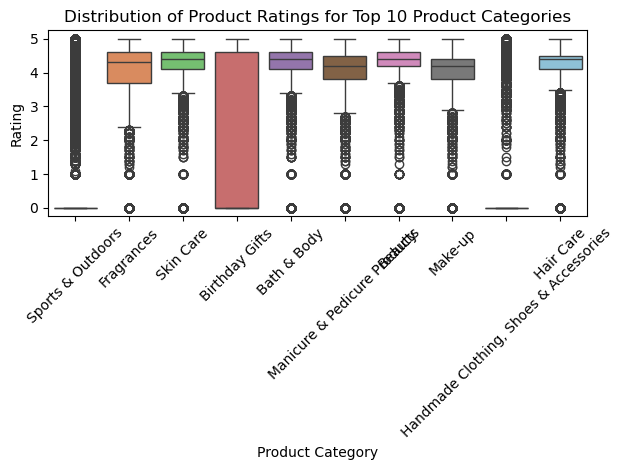

In [11]:
# Filter out the top 10 categories based on count
sns.boxplot(x='category', y='stars', data=df_top_10, palette='muted')
plt.title('Distribution of Product Ratings for Top 10 Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [12]:
crosstab_2 = pd.crosstab(df['price'], df['stars'])

crosstab_2

chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab_2)
print (f"\n chi2 statistics :", chi2_statistic)
print(f"\n chi2_p_value:", chi2_p_value)

# Carmer's V 
# Computing the association between variables in 'crosstab_result' using the "cramer" method
print(f"\n carmer's V:", association(crosstab_2, method="cramer"))


 chi2 statistics : 2360775.966201346

 chi2_p_value: 1.0

 carmer's V: 0.15350264705482008


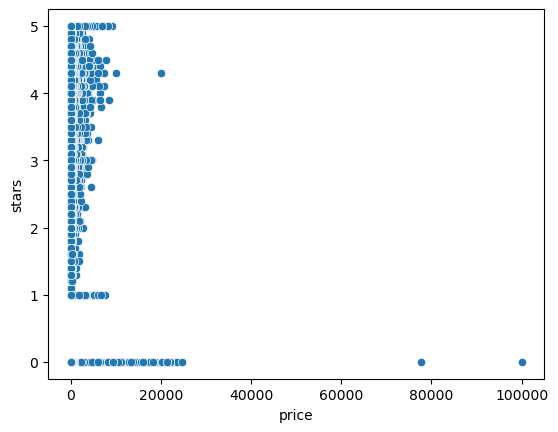

In [13]:
# Visualize
sns.scatterplot(data=df, x='price', y='stars');
plt.show()

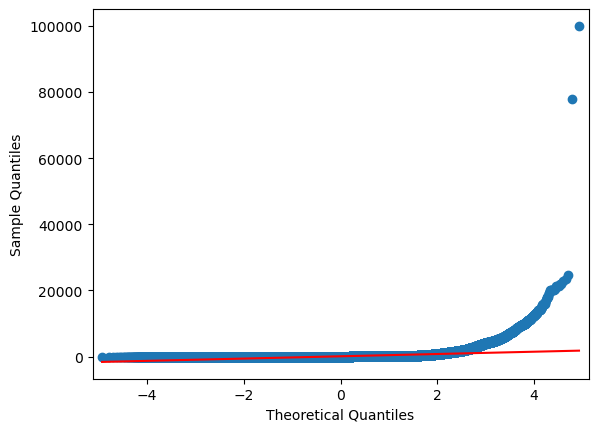

In [14]:
import statsmodels.api as sm

# Generating a Q-Q plot for 'SalePrice' to check if its distribution follows a normal distribution
sm.qqplot(df['price'], line='s');

In [15]:
df_numerical = df.select_dtypes("number").columns
df_numerical

Index(['uid', 'stars', 'reviews', 'price', 'boughtInLastMonth'], dtype='object')

In [18]:
df_numerical_1 = df_numerical.drop(['boughtInLastMonth'])

In [20]:
df_numerical_1 = df_numerical.drop(['reviews'])

Correlation Coefficient between Price and Stars: -0.12490673262148641


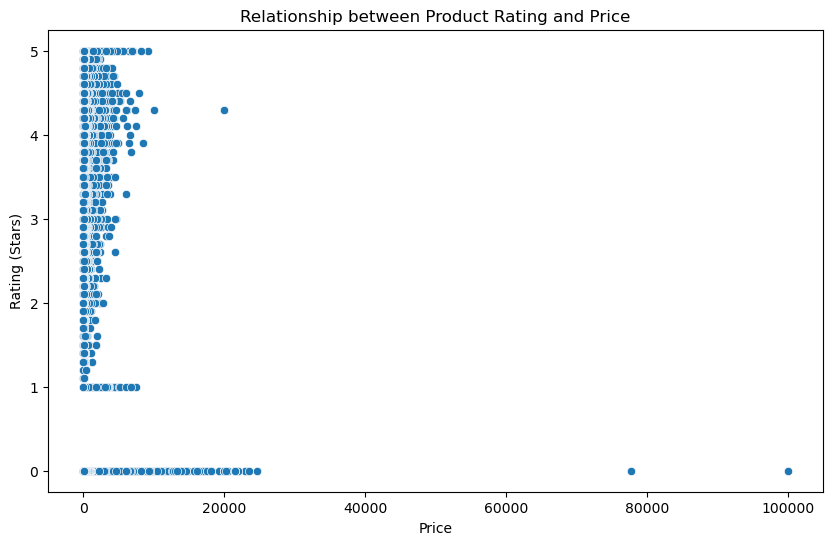

In [25]:
correlation_coefficient = df['price'].corr(df['stars'])
print("Correlation Coefficient between Price and Stars:", correlation_coefficient)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='stars', data=df)
plt.title('Relationship between Product Rating and Price')
plt.xlabel('Price')
plt.ylabel('Rating (Stars)')
plt.show()

    

AttributeError: 'Index' object has no attribute 'corr'